In [1]:
import pandas as pd

# Load the datasets
amr_data = pd.read_csv('final_AMR_data.csv')
gdp_data = pd.read_csv('gdp_data.csv')
health_expenditure_data = pd.read_csv('health_expenditure.csv')

# Display the first few rows and the data types of each dataset
data_overview = {
    "AMR Data": {
        "Preview": amr_data.head(),
        "Info": amr_data.info()
    },
    "GDP Data": {
        "Preview": gdp_data.head(),
        "Info": gdp_data.info()
    },
    "Health Expenditure Data": {
        "Preview": health_expenditure_data.head(),
        "Info": health_expenditure_data.info()
    }
}
data_overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         16829 non-null  int64  
 1   HealthTopic                                        16829 non-null  object 
 2   Bacteria                                           16829 non-null  object 
 3   Drug_Class                                         16829 non-null  object 
 4   Year                                               16829 non-null  int64  
 5   geo                                                16829 non-null  object 
 6   RegionName                                         16829 non-null  object 
 7   Completeness age_%                                 0 non-null      float64
 8   Completeness gender_%                              0 non-null      float64
 9   I - 's

{'AMR Data': {'Preview':    Unnamed: 0               HealthTopic            Bacteria       Drug_Class   
  0           0  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides  \
  1           1  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
  2           2  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
  3           3  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
  4           4  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
  
     Year geo RegionName  Completeness age_%  Completeness gender_%   
  0  2012  AT    Austria                 NaN                    NaN  \
  1  2012  BE    Belgium                 NaN                    NaN   
  2  2012  BG   Bulgaria                 NaN                    NaN   
  3  2012  CY     Cyprus                 NaN                    NaN   
  4  2012  CZ    Czechia                 NaN                    NaN   
  
     I - 'susceptible, increased exposure' isolates _

In [2]:
# Examine unique bacteria types in the AMR data
unique_bacteria_types = amr_data['Bacteria'].unique()

# Display unique bacteria types and prepare to handle missing data
unique_bacteria_types


array(['Acinetobacter spp.', 'Enterococcus faecalis',
       'Enterococcus faecium', 'Escherichia coli',
       'Klebsiella pneumoniae', 'Pseudomonas aeruginosa',
       'Staphylococcus aureus', 'Streptococcus pneumoniae'], dtype=object)

In [3]:
import numpy as np

# Handle missing values in the AMR data
# Drop columns with all missing values and convert percentage columns to floats
amr_data_cleaned = amr_data.drop(columns=['Completeness age_%', 'Completeness gender_%'])

# Replace non-numeric characters in percentage columns and convert them to float
amr_data_cleaned['Penicillin non-wild-type isolates, percentage_%'] = pd.to_numeric(
    amr_data['Penicillin non-wild-type isolates, percentage_%'].str.replace('%', ''), errors='coerce'
)
amr_data_cleaned['R - resistant isolates, percentage  _%'] = pd.to_numeric(
    amr_data['R - resistant isolates, percentage  _%'].str.replace('%', ''), errors='coerce'
)

# Check for other missing values and fill with 0 (considering further analysis to decide on better imputation methods if necessary)
amr_data_cleaned = amr_data_cleaned.fillna(0)

# Display the cleaned data info and first few rows to confirm changes
amr_data_cleaned.info(), amr_data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         16829 non-null  int64  
 1   HealthTopic                                        16829 non-null  object 
 2   Bacteria                                           16829 non-null  object 
 3   Drug_Class                                         16829 non-null  object 
 4   Year                                               16829 non-null  int64  
 5   geo                                                16829 non-null  object 
 6   RegionName                                         16829 non-null  object 
 7   I - 'susceptible, increased exposure' isolates _N  16829 non-null  float64
 8   Penicillin non-wild-type isolates, percentage_%    16829 non-null  float64
 9   R - re

(None,
    Unnamed: 0               HealthTopic            Bacteria       Drug_Class   
 0           0  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides  \
 1           1  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
 2           2  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
 3           3  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
 4           4  Antimicrobial resistance  Acinetobacter spp.  Aminoglycosides   
 
    Year geo RegionName  I - 'susceptible, increased exposure' isolates _N   
 0  2012  AT    Austria                                                0.0  \
 1  2012  BE    Belgium                                                0.0   
 2  2012  BG   Bulgaria                                                6.0   
 3  2012  CY     Cyprus                                                0.0   
 4  2012  CZ    Czechia                                                0.0   
 
    Penicillin non-wild-type isolat

In [4]:
# First, ensure consistent naming and data types in the 'geo' and 'Year' columns for merging
gdp_data_cleaned = gdp_data.rename(columns={'CP_EUR_HAB': 'GDP_per_capita_EUR', 'CP_MEUR': 'GDP_million_EUR'})
health_expenditure_data_cleaned = health_expenditure_data.rename(columns={'EUR_HAB': 'Health_Exp_per_capita_EUR', 'MIO_EUR': 'Health_Exp_million_EUR'})

# Merge the datasets
amr_gdp_merged = pd.merge(amr_data_cleaned, gdp_data_cleaned, on=['geo', 'Year'], how='left')
amr_gdp_health_merged = pd.merge(amr_gdp_merged, health_expenditure_data_cleaned, on=['geo', 'Year'], how='left')

# Check the first few rows and the structure of the merged dataset
amr_gdp_health_merged.info(), amr_gdp_health_merged.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0_x                                       16829 non-null  int64  
 1   HealthTopic                                        16829 non-null  object 
 2   Bacteria                                           16829 non-null  object 
 3   Drug_Class                                         16829 non-null  object 
 4   Year                                               16829 non-null  int64  
 5   geo                                                16829 non-null  object 
 6   RegionName                                         16829 non-null  object 
 7   I - 'susceptible, increased exposure' isolates _N  16829 non-null  float64
 8   Penicillin non-wild-type isolates, percentage_%    16829 non-null  float64
 9   R - re

(None,
    Unnamed: 0_x               HealthTopic            Bacteria   
 0             0  Antimicrobial resistance  Acinetobacter spp.  \
 1             1  Antimicrobial resistance  Acinetobacter spp.   
 2             2  Antimicrobial resistance  Acinetobacter spp.   
 3             3  Antimicrobial resistance  Acinetobacter spp.   
 4             4  Antimicrobial resistance  Acinetobacter spp.   
 
         Drug_Class  Year geo RegionName   
 0  Aminoglycosides  2012  AT    Austria  \
 1  Aminoglycosides  2012  BE    Belgium   
 2  Aminoglycosides  2012  BG   Bulgaria   
 3  Aminoglycosides  2012  CY     Cyprus   
 4  Aminoglycosides  2012  CZ    Czechia   
 
    I - 'susceptible, increased exposure' isolates _N   
 0                                                0.0  \
 1                                                0.0   
 2                                                6.0   
 3                                                0.0   
 4                                          

In [5]:
# Filter the dataset for Escherichia coli
ecoli_data = amr_gdp_health_merged[amr_gdp_health_merged['Bacteria'] == 'Escherichia coli']

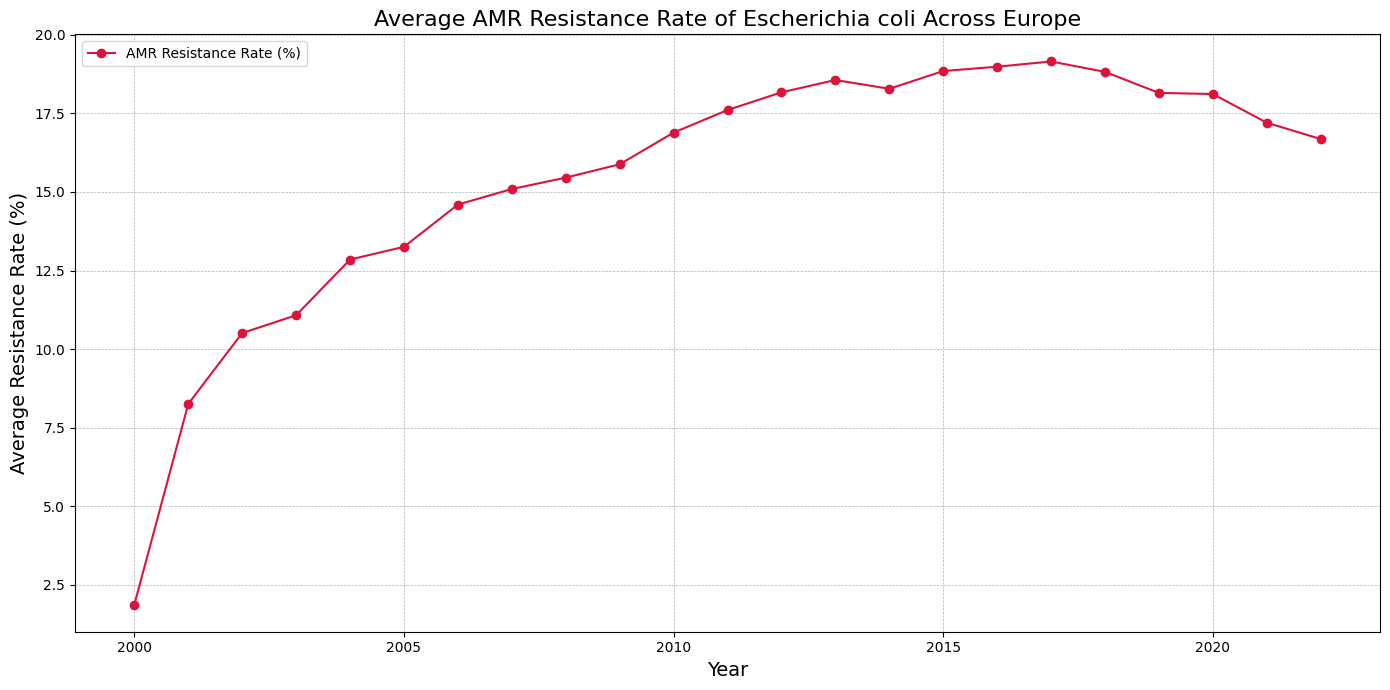

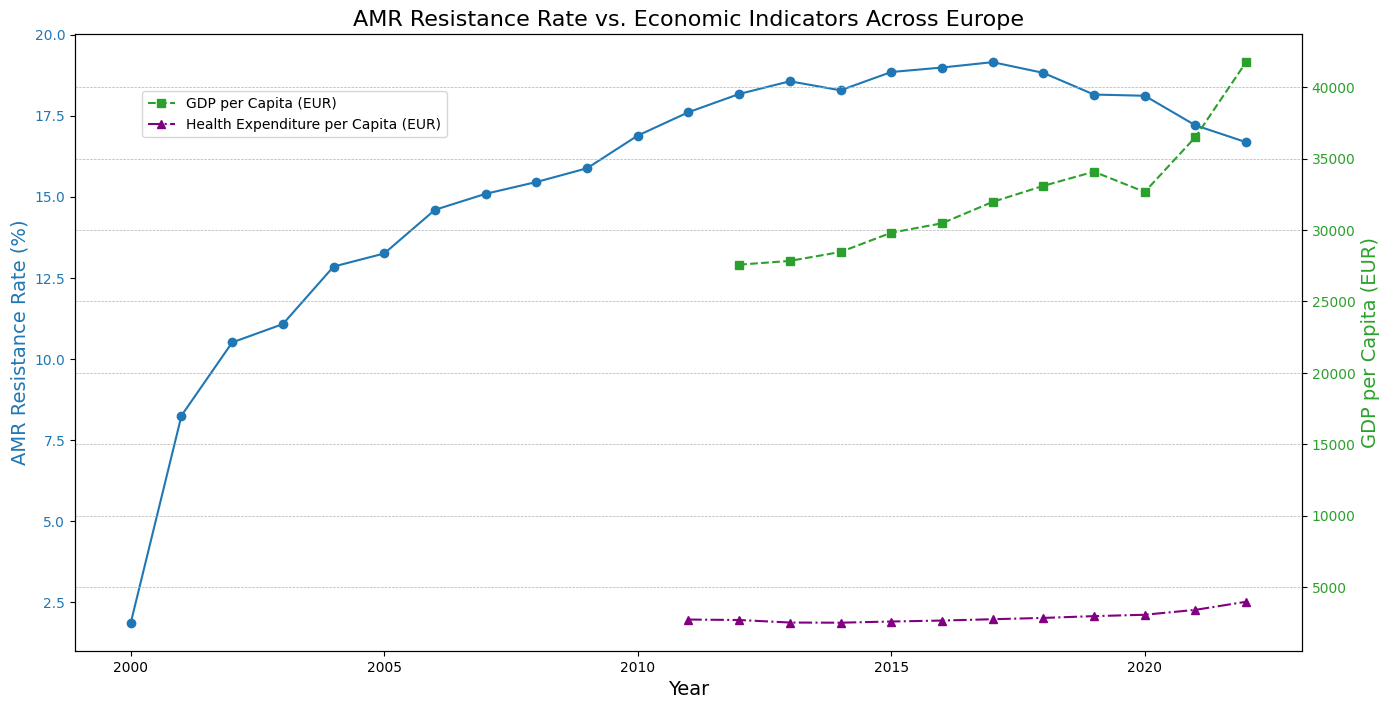

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating data for Escherichia coli across Europe for a clearer overall trend
ecoli_data_agg = ecoli_data.groupby('Year').agg({
    'R - resistant isolates, percentage  _%': 'mean',
    'GDP_per_capita_EUR': 'mean',
    'Health_Exp_per_capita_EUR': 'mean'
}).reset_index()

# Creating a fancy time-series plot to visualize trends across Europe as a whole
plt.figure(figsize=(14, 7))
plt.plot(ecoli_data_agg['Year'], ecoli_data_agg['R - resistant isolates, percentage  _%'], marker='o', linestyle='-', color='crimson', label='AMR Resistance Rate (%)')
plt.title('Average AMR Resistance Rate of Escherichia coli Across Europe', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Resistance Rate (%)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Creating combined plot with GDP and Health Expenditure
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('AMR Resistance Rate (%)', color=color, fontsize=14)
ax1.plot(ecoli_data_agg['Year'], ecoli_data_agg['R - resistant isolates, percentage  _%'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('GDP per Capita (EUR)', color=color, fontsize=14)
ax2.plot(ecoli_data_agg['Year'], ecoli_data_agg['GDP_per_capita_EUR'], color=color, marker='s', linestyle='--', label='GDP per Capita (EUR)')
ax2.plot(ecoli_data_agg['Year'], ecoli_data_agg['Health_Exp_per_capita_EUR'], color='purple', marker='^', linestyle='-.', label='Health Expenditure per Capita (EUR)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Escherichia coli vs. Economic Indicators Across Europe', fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


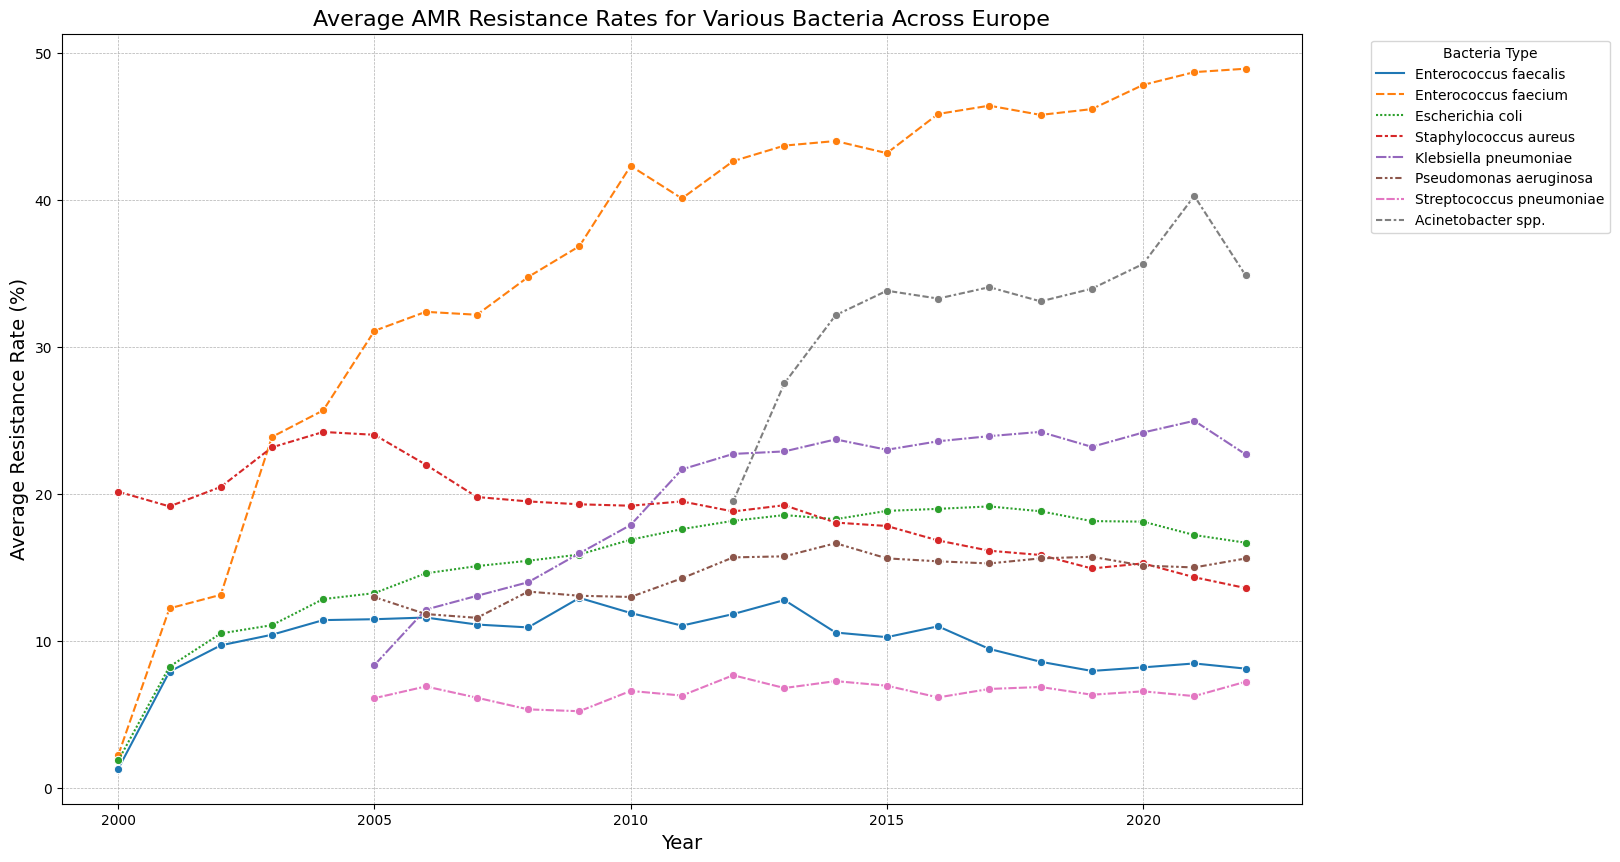

In [9]:
# Aggregating data across Europe for all bacteria types
amr_data_agg_all = amr_gdp_health_merged.groupby(['Year', 'Bacteria']).agg({
    'R - resistant isolates, percentage  _%': 'mean',
    'GDP_per_capita_EUR': 'mean',
    'Health_Exp_per_capita_EUR': 'mean'
}).reset_index()

# Creating a combined time-series plot for all bacteria types
plt.figure(figsize=(16, 10))
sns.lineplot(data=amr_data_agg_all, x='Year', y='R - resistant isolates, percentage  _%', hue='Bacteria', marker='o', style='Bacteria')
plt.title('Average AMR Resistance Rates for Various Bacteria Across Europe', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Resistance Rate (%)', fontsize=14)
plt.legend(title='Bacteria Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


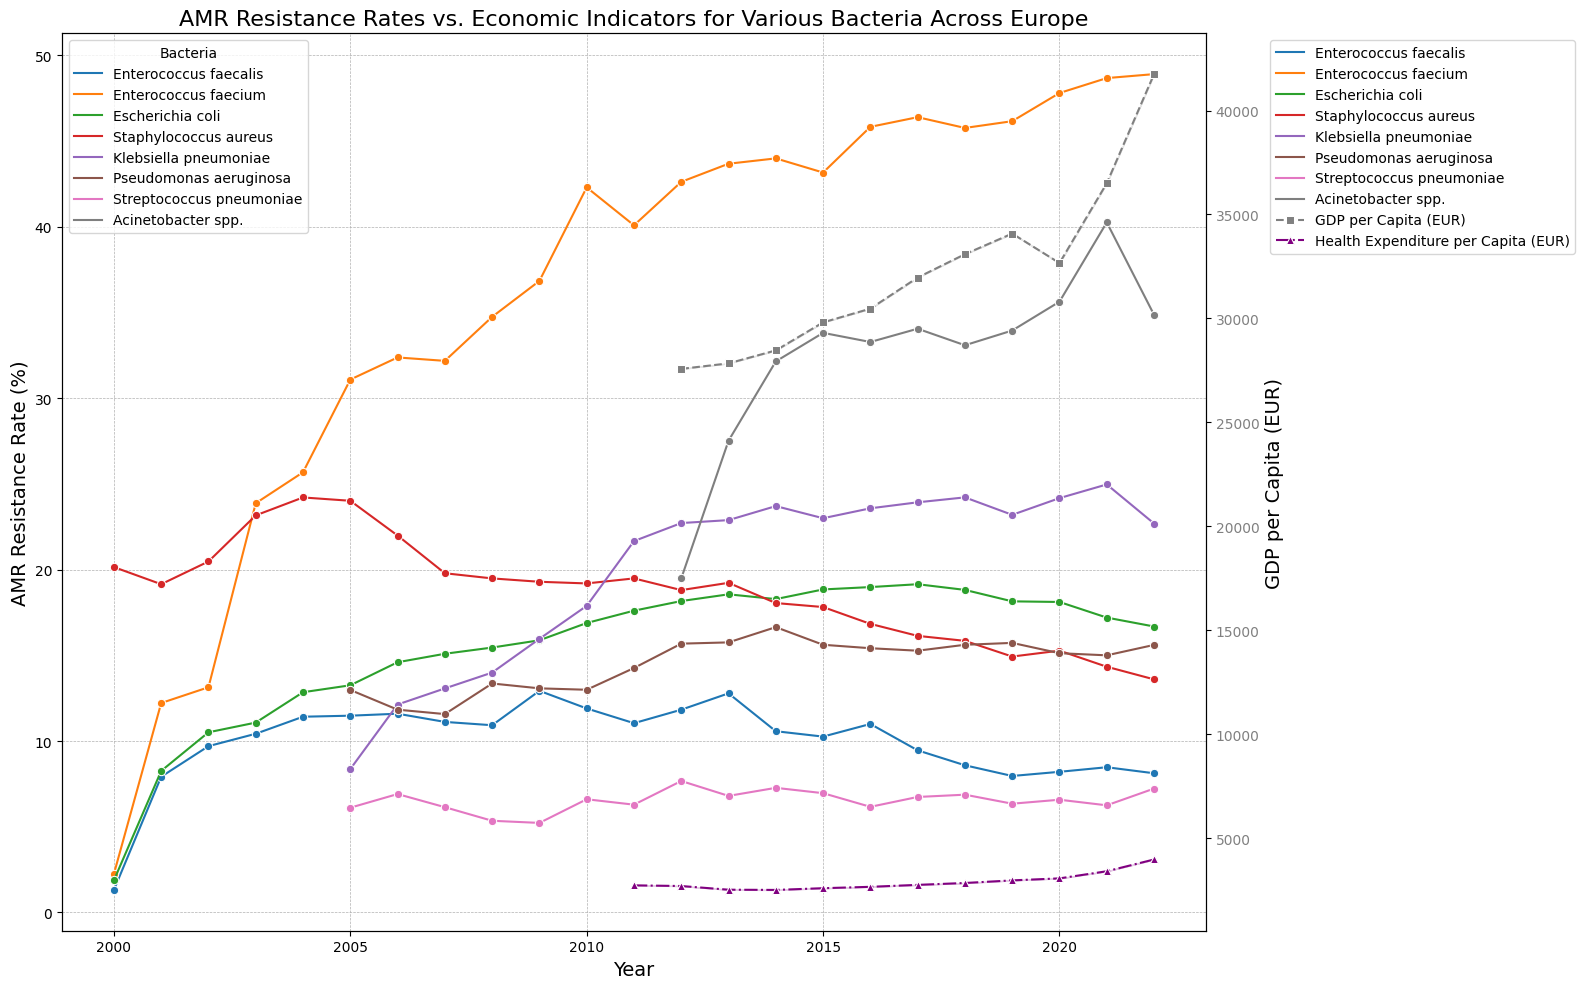

,"R - resistant isolates, percentage _%",GDP_per_capita_EUR,Health_Exp_per_capita_EUR
"R - resistant isolates, percentage _%",1.000000,0.014453,0.013422
GDP_per_capita_EUR,0.014453,1.000000,0.957044
Health_Exp_per_capita_EUR,0.013422,0.957044,1.000000


In [10]:
# Creating a combined plot with economic indicators for all bacteria types
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plotting AMR Resistance Rates
sns.lineplot(data=amr_data_agg_all, x='Year', y='R - resistant isolates, percentage  _%', hue='Bacteria', marker='o', ax=ax1)
ax1.set_title('AMR Resistance Rates vs. Economic Indicators for Various Bacteria Across Europe', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('AMR Resistance Rate (%)', fontsize=14)
ax1.tick_params(axis='y')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding GDP per capita on secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=amr_data_agg_all, x='Year', y='GDP_per_capita_EUR', color='grey', marker='s', linestyle='--', label='GDP per Capita (EUR)', ax=ax2)
ax2.set_ylabel('GDP per Capita (EUR)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='grey')

# Adding Health Expenditure per capita on secondary y-axis
sns.lineplot(data=amr_data_agg_all, x='Year', y='Health_Exp_per_capita_EUR', color='purple', marker='^', linestyle='-.', label='Health Expenditure per Capita (EUR)', ax=ax2)

# Adjusting the legend to show all labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))

fig.tight_layout()
plt.show()

# Conduct statistical analysis to calculate correlation coefficients
# Extracting numerical columns for correlation analysis
correlation_data = amr_data_agg_all[['R - resistant isolates, percentage  _%', 'GDP_per_capita_EUR', 'Health_Exp_per_capita_EUR']].corr()

correlation_data


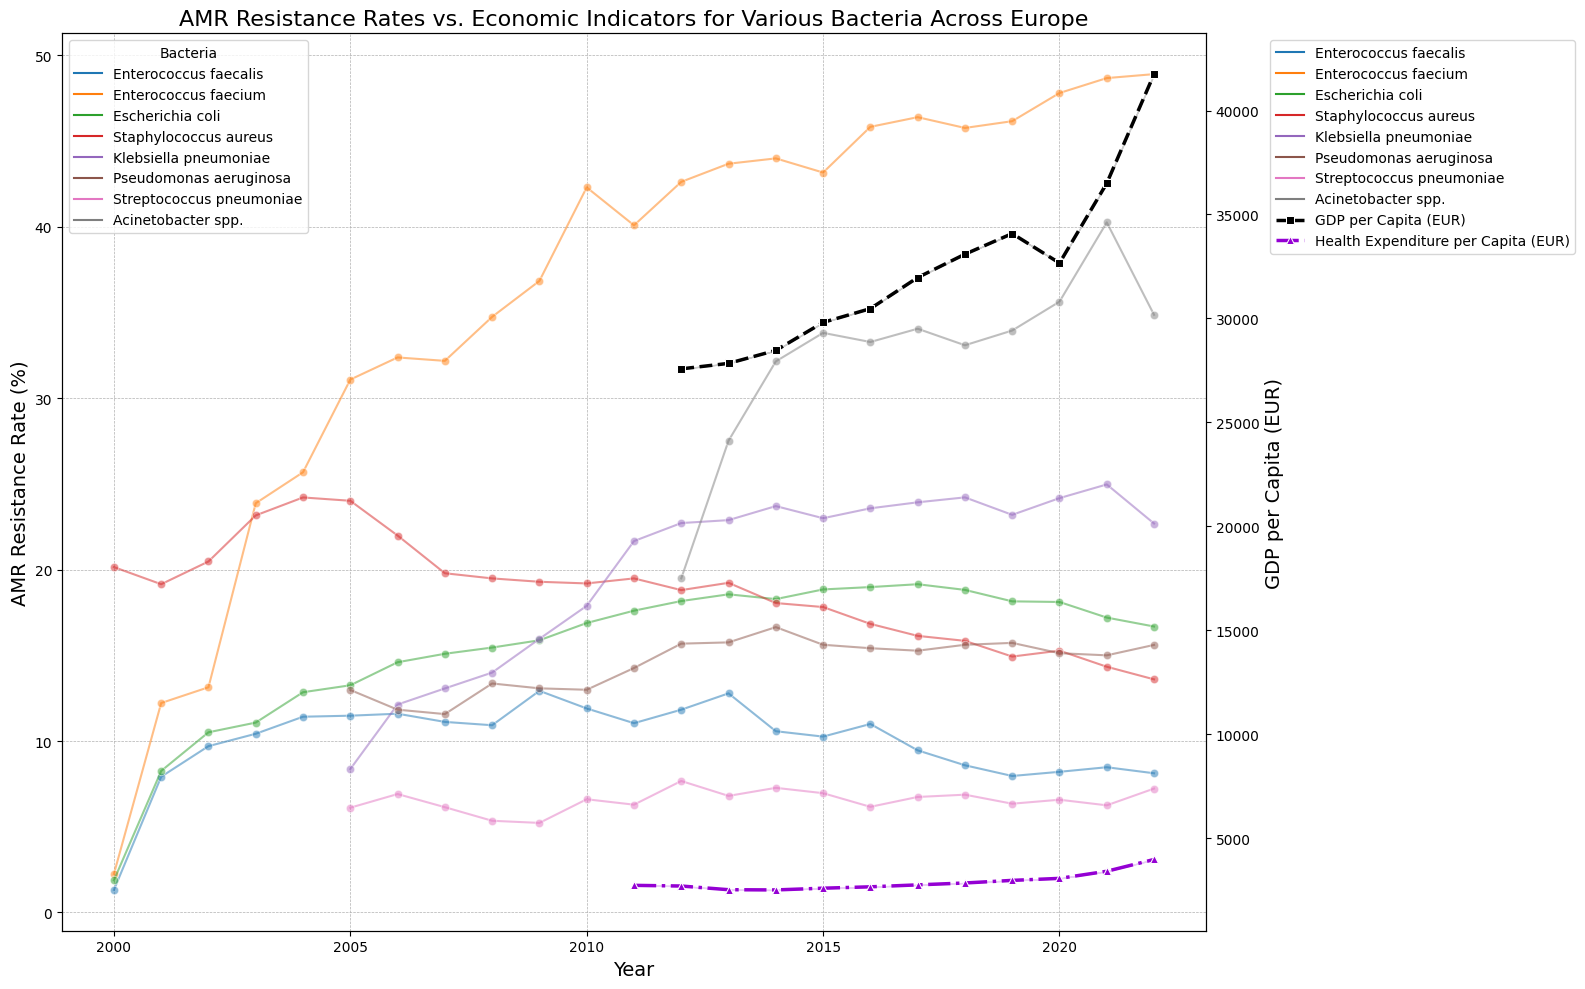

,Bacteria,Correlation with GDP,Correlation with Health Expenditure
0,Acinetobacter spp.,0.627223,0.468200
1,Enterococcus faecalis,-0.795750,-0.690744
2,Enterococcus faecium,0.879210,0.726958
3,Escherichia coli,-0.729455,-0.796604
4,Klebsiella pneumoniae,0.177500,0.148376
5,Pseudomonas aeruginosa,-0.389215,-0.207039
6,Staphylococcus aureus,-0.933225,-0.812610
7,Streptococcus pneumoniae,-0.216148,-0.025033


In [11]:
# Adjusting the previous plot to highlight economic indicators more prominently
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plotting AMR Resistance Rates
sns.lineplot(data=amr_data_agg_all, x='Year', y='R - resistant isolates, percentage  _%', hue='Bacteria', marker='o', ax=ax1, alpha=0.5)  # Reduced opacity for bacteria lines
ax1.set_title('AMR Resistance Rates vs. Economic Indicators for Various Bacteria Across Europe', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('AMR Resistance Rate (%)', fontsize=14)
ax1.tick_params(axis='y')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding GDP per capita on secondary y-axis with more emphasis
ax2 = ax1.twinx()
sns.lineplot(data=amr_data_agg_all, x='Year', y='GDP_per_capita_EUR', color='black', marker='s', linestyle='--', label='GDP per Capita (EUR)', ax=ax2, linewidth=2.5)
ax2.set_ylabel('GDP per Capita (EUR)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black')

# Adding Health Expenditure per capita on secondary y-axis with more emphasis
sns.lineplot(data=amr_data_agg_all, x='Year', y='Health_Exp_per_capita_EUR', color='darkviolet', marker='^', linestyle='-.', label='Health Expenditure per Capita (EUR)', ax=ax2, linewidth=2.5)

# Adjusting the legend to show all labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))

fig.tight_layout()
plt.show()

# Calculating correlation coefficients for each bacteria type
bacteria_correlation = amr_data_agg_all.groupby('Bacteria').apply(
    lambda group: group[['R - resistant isolates, percentage  _%', 'GDP_per_capita_EUR', 'Health_Exp_per_capita_EUR']].corr().iloc[0, 1:]
).reset_index()

# Renaming columns for clarity
bacteria_correlation.columns = ['Bacteria', 'Correlation with GDP', 'Correlation with Health Expenditure']
bacteria_correlation


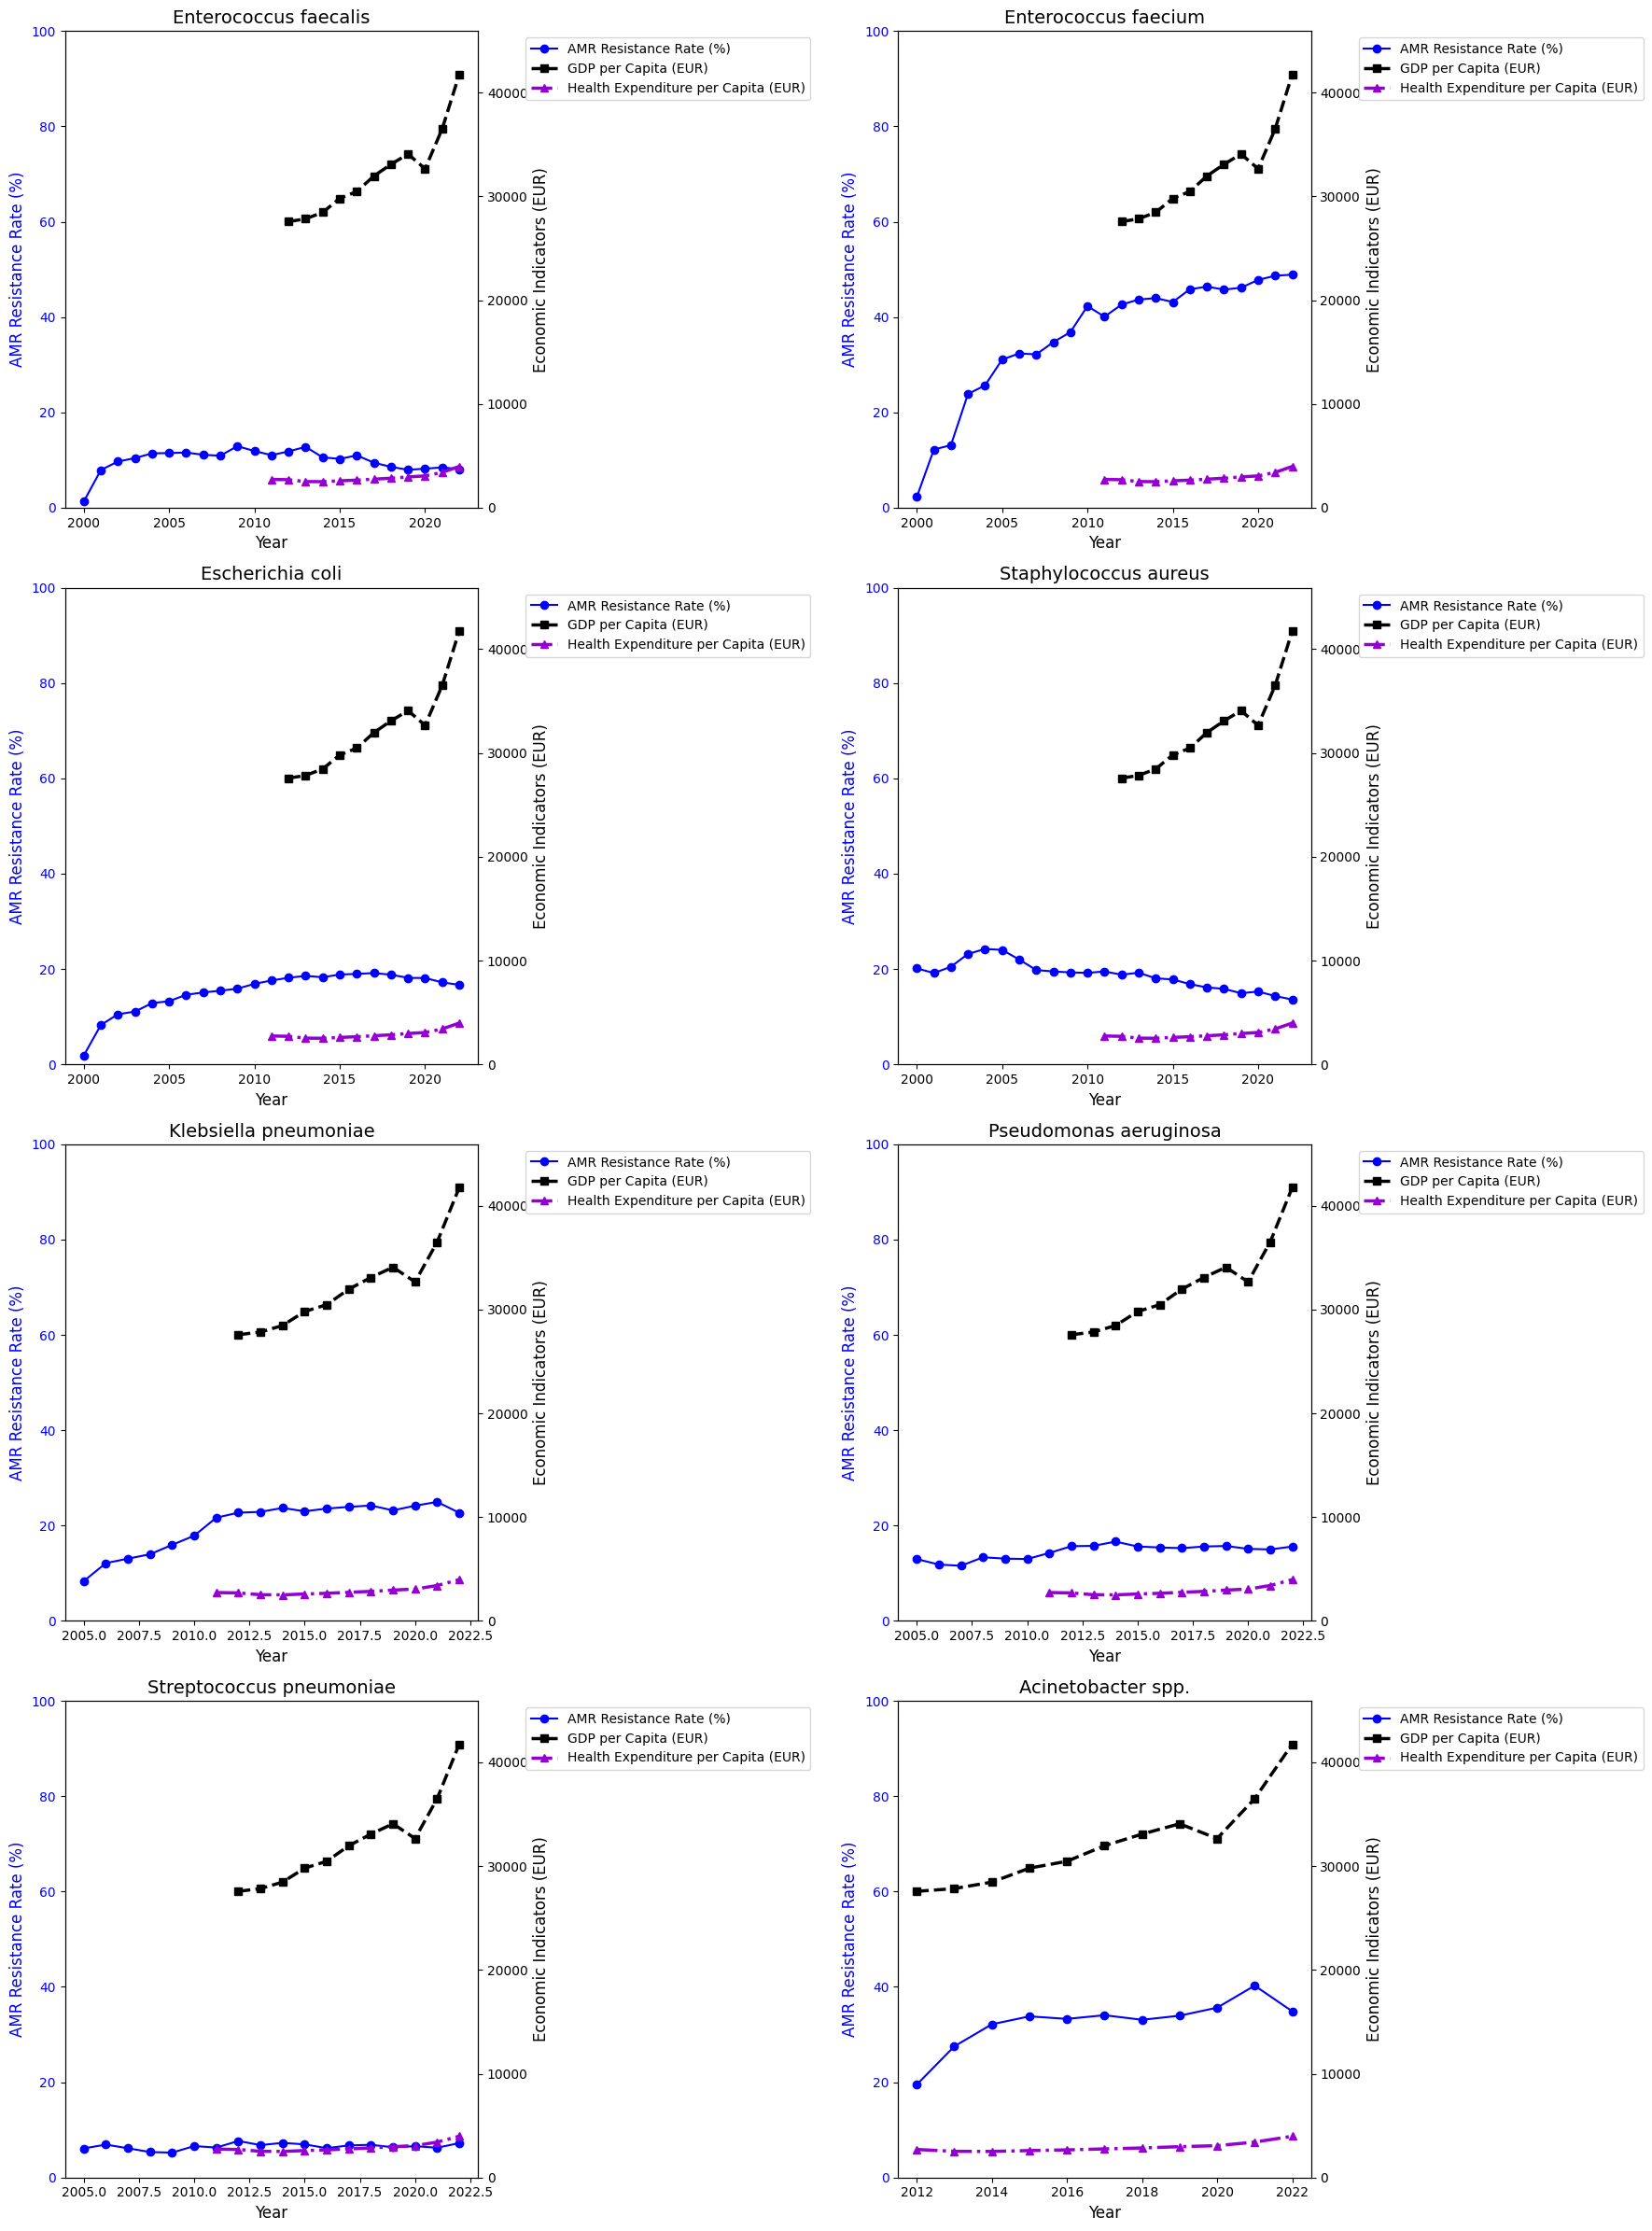

In [12]:
# Creating separate plots for each bacteria type with economic indicators
fig, axes = plt.subplots(4, 2, figsize=(18, 24))  # Subplot grid setup
axes = axes.flatten()  # Flatten to index axes easily

# Loop through each bacteria type and plot AMR rates alongside economic indicators
for idx, (bacteria, ax) in enumerate(zip(amr_data_agg_all['Bacteria'].unique(), axes)):
    # Filter data for the current bacteria type
    bacteria_data = amr_data_agg_all[amr_data_agg_all['Bacteria'] == bacteria]
    
    # Primary axis for AMR rates
    ax.plot(bacteria_data['Year'], bacteria_data['R - resistant isolates, percentage  _%'], color='blue', marker='o', linestyle='-', label='AMR Resistance Rate (%)')
    ax.set_title(f'{bacteria}', fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('AMR Resistance Rate (%)', color='blue', fontsize=12)
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Secondary axis for GDP
    ax2 = ax.twinx()
    ax2.plot(bacteria_data['Year'], bacteria_data['GDP_per_capita_EUR'], color='black', marker='s', linestyle='--', label='GDP per Capita (EUR)', linewidth=2.5)
    ax2.plot(bacteria_data['Year'], bacteria_data['Health_Exp_per_capita_EUR'], color='darkviolet', marker='^', linestyle='-.', label='Health Expenditure per Capita (EUR)', linewidth=2.5)
    ax2.set_ylabel('Economic Indicators (EUR)', fontsize=12)
    ax2.tick_params(axis='y')

    # Legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.1, 1))

    # Ensuring same scale across all plots
    ax.set_ylim(0, 100)
    ax2.set_ylim(0, max(amr_data_agg_all['GDP_per_capita_EUR'].max(), amr_data_agg_all['Health_Exp_per_capita_EUR'].max()) * 1.1)

fig.tight_layout()
plt.show()


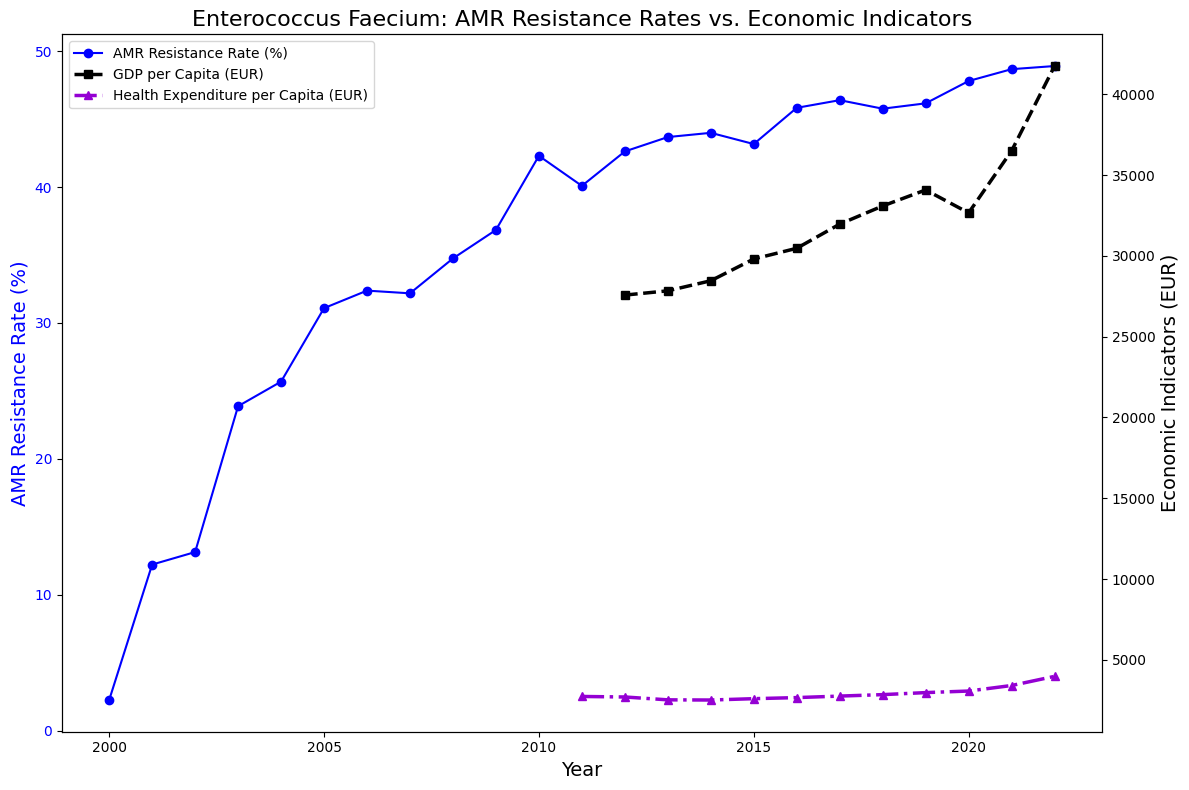

In [13]:
# Extracting data specifically for Enterococcus faecium
faecium_data = amr_data_agg_all[amr_data_agg_all['Bacteria'] == 'Enterococcus faecium']

# Create a plot for Enterococcus faecium
fig, ax1 = plt.subplots(figsize=(12, 8))

# Primary axis for AMR rates
ax1.plot(faecium_data['Year'], faecium_data['R - resistant isolates, percentage  _%'], color='blue', marker='o', linestyle='-', label='AMR Resistance Rate (%)')
ax1.set_title('Enterococcus Faecium: AMR Resistance Rates vs. Economic Indicators', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('AMR Resistance Rate (%)', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis for GDP
ax2 = ax1.twinx()
ax2.plot(faecium_data['Year'], faecium_data['GDP_per_capita_EUR'], color='black', marker='s', linestyle='--', label='GDP per Capita (EUR)', linewidth=2.5)
ax2.plot(faecium_data['Year'], faecium_data['Health_Exp_per_capita_EUR'], color='darkviolet', marker='^', linestyle='-.', label='Health Expenditure per Capita (EUR)', linewidth=2.5)
ax2.set_ylabel('Economic Indicators (EUR)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black')

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()
plt.show()


/Users/namirsacic/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namirsacic/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namirsacic/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namirsacic/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

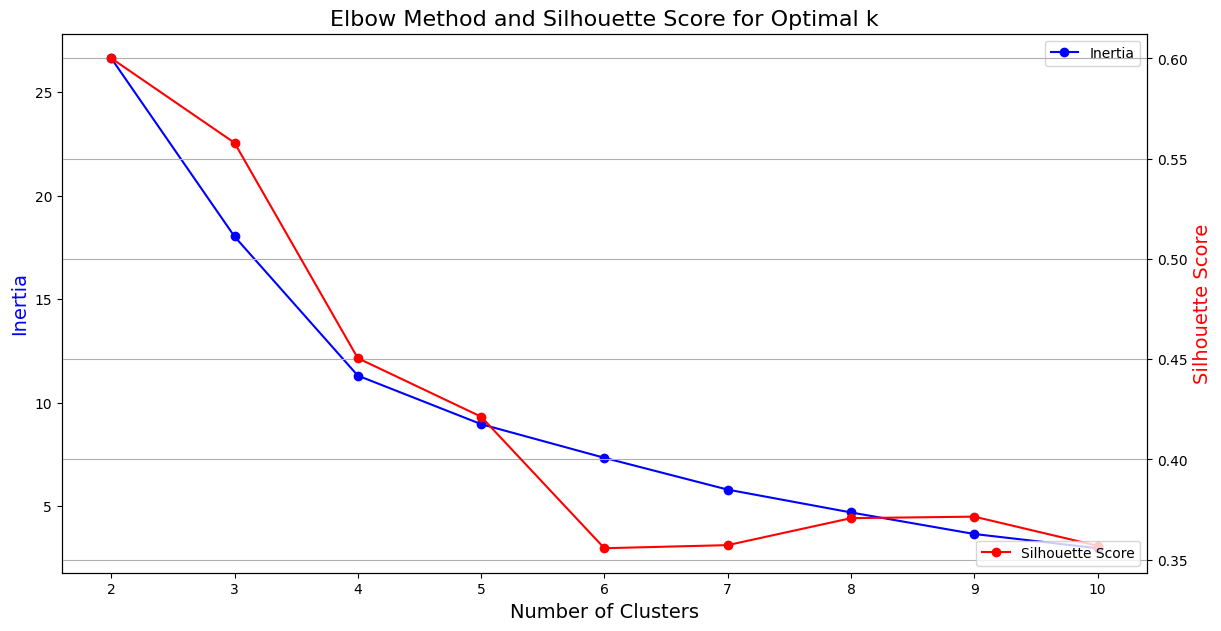

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Preparing data for clustering: Average AMR, GDP, and Health Expenditure per region
cluster_data = amr_gdp_health_merged.groupby('RegionName').agg({
    'R - resistant isolates, percentage  _%': 'mean',
    'GDP_per_capita_EUR': 'mean',
    'Health_Exp_per_capita_EUR': 'mean'
}).dropna()  # Dropping any rows with missing data

# Normalize the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# Determine the optimal number of clusters using the Elbow method and Silhouette Score
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Checking from 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_scaled, kmeans.labels_))

# Plotting the Elbow curve and Silhouette scores
fig, ax1 = plt.subplots(figsize=(14, 7))

ax2 = ax1.twinx()
ax1.plot(K_range, inertia, 'bo-', label='Inertia')
ax2.plot(K_range, silhouette_scores, 'ro-', label='Silhouette Score')

ax1.set_xlabel('Number of Clusters', fontsize=14)
ax1.set_ylabel('Inertia', color='b', fontsize=14)
ax2.set_ylabel('Silhouette Score', color='r', fontsize=14)
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.title('Elbow Method and Silhouette Score for Optimal k', fontsize=16)
plt.grid(True)
plt.show()


In [15]:
# Clustering with the optimal number of clusters k=3
kmeans_optimal = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(cluster_scaled)

# Add the cluster labels to the original data
cluster_data['Cluster'] = cluster_labels

# Analyzing the characteristics of each cluster
cluster_characteristics = cluster_data.groupby('Cluster').agg({
    'R - resistant isolates, percentage  _%': ['mean', 'min', 'max', 'std'],
    'GDP_per_capita_EUR': ['mean', 'min', 'max', 'std'],
    'Health_Exp_per_capita_EUR': ['mean', 'min', 'max', 'std']
})

cluster_characteristics


/Users/namirsacic/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


R - resistant isolates, percentage  _%                         
                                          mean        min        max   
Cluster                                                                
0                                    10.112442   8.984022  11.240861  \
1                                    25.984223  11.075127  36.967909   
2                                    11.304662   4.105245  16.048106   

                  GDP_per_capita_EUR                               
              std               mean           min           max   
Cluster                                                            
0        1.595826       86473.181818  73701.818182  99244.545455  \
1        6.405046       17065.755682   7951.818182  28820.000000   
2        3.601828       43094.204545  24647.272727  63139.090909   

                      Health_Exp_per_capita_EUR                             
                  std                      mean          min          max   
Cluster                                                                     
0        18061.435665               6118.239088  5303.973820  6932.504356  \
1         5620.200495               1309.838195   500.092147  2550.534545   
2        10007.744284               4212.556598  2350.807500  5242.528034   

                      
                 std  
Cluster               
0        1151.544985  
1         596.697439  
2         760.031271

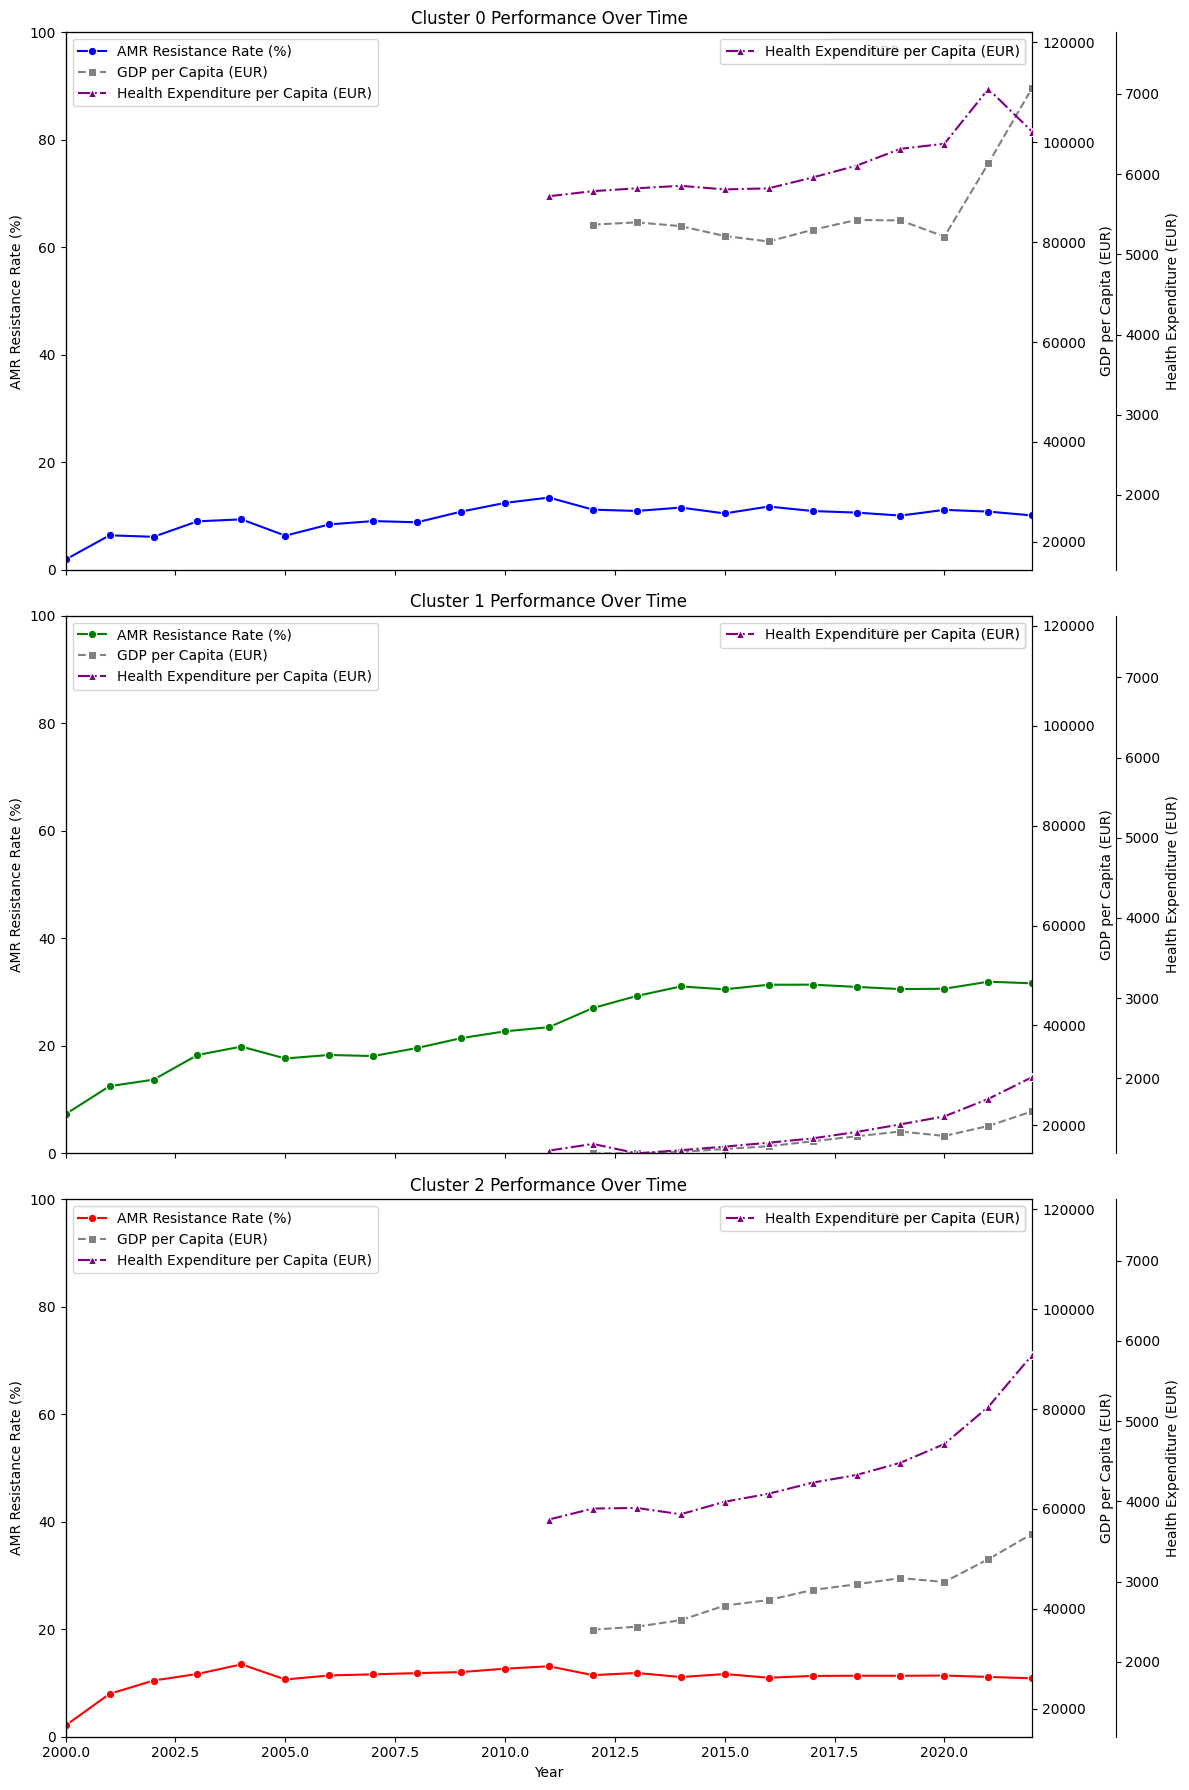

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-defined scales for each axis based on the overall data range
year_min, year_max = cluster_performance['Year'].min(), cluster_performance['Year'].max()
amr_min, amr_max = 0, 100  # Example range for AMR Resistance Rate
gdp_min, gdp_max = cluster_performance['GDP_per_capita_EUR'].min(), cluster_performance['GDP_per_capita_EUR'].max() * 1.1
health_exp_min, health_exp_max = cluster_performance['Health_Exp_per_capita_EUR'].min(), cluster_performance['Health_Exp_per_capita_EUR'].max() * 1.1

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18), sharex=True)

for i, cluster in enumerate(sorted(clusters)):  # Sorted to maintain order
    ax = axes[i]
    cluster_data = cluster_performance[cluster_performance['Cluster'] == cluster]
    
    # AMR Resistance Rate
    sns.lineplot(data=cluster_data, x='Year', y='R - resistant isolates, percentage  _%', ax=ax, label='AMR Resistance Rate (%)', color=colors[i], marker='o')
    ax.set_ylim(amr_min, amr_max)
    
    # GDP per Capita
    ax2 = ax.twinx()
    sns.lineplot(data=cluster_data, x='Year', y='GDP_per_capita_EUR', ax=ax2, label='GDP per Capita (EUR)', color='grey', marker='s', linestyle='--')
    ax2.set_ylim(gdp_min, gdp_max)
    
    # Health Expenditure per Capita
    ax3 = ax.twinx()
    sns.lineplot(data=cluster_data, x='Year', y='Health_Exp_per_capita_EUR', ax=ax3, label='Health Expenditure per Capita (EUR)', color='purple', marker='^', linestyle='-.')
    ax3.set_ylim(health_exp_min, health_exp_max)
    ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to avoid overlap
    
    # Setting uniform x-axis for the years
    ax.set_xlim(year_min, year_max)

    # Title and labels
    ax.set_title(f'Cluster {cluster} Performance Over Time')
    ax.set_ylabel('AMR Resistance Rate (%)')
    ax2.set_ylabel('GDP per Capita (EUR)')
    ax3.set_ylabel('Health Expenditure (EUR)')

    # Legend configuration
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Show which countries are in each cluster
countries_clusters.sort_values('Cluster')